In [1]:
import pandas as pd
import yfinance as yf
from fredapi import Fred
import matplotlib.pyplot as plt

# Initialize FRED API (you need to replace 'your_api_key' with your actual FRED API key)
fred = Fred(api_key='8445855393be6d75a6d33bcddffc7958')

# Fetch data from FRED
gdp = fred.get_series('GDPC1')
potential_gdp = fred.get_series('GDPPOT')
inflation = fred.get_series('GDPDEF')
fed_funds_rate = fred.get_series('FEDFUNDS')


In [2]:
# Calculate inflation rate (year-over-year change in inflation)
inflation_rate = inflation.pct_change(periods=4) * 100

# Calculate output gap
output_gap = ((gdp - potential_gdp) / potential_gdp) * 100

# Define Taylor Rule parameters
inflation_target = 2.0
r_star = 2.0  # Long-term equilibrium real interest rate
alpha = 0.5  # Weight on output gap
beta = 0.5  # Weight on inflation gap

# Calculate Taylor Rule
taylor_rule = r_star + inflation_rate + alpha * output_gap + beta * (inflation_rate - inflation_target)

# Assuming s1 and s2 are your Series with DateTimeIndex
df1 = taylor_rule.to_frame(name='Taylor Rule Rate')
df2 = fed_funds_rate.to_frame(name='Actual Fed Funds Rate')

# Merge the DataFrames
results = pd.merge(df1, df2, left_index=True, right_index=True, how='left')
results = results.dropna()


In [3]:
# Create a DataFrame with the inputs
inputs = pd.DataFrame({
    'Date': taylor_rule.index,
    'R_star Rate': r_star,
    'Inflation Rate': inflation_rate,
    'Inflation Target': inflation_target,   
    'Output Gap': output_gap

})


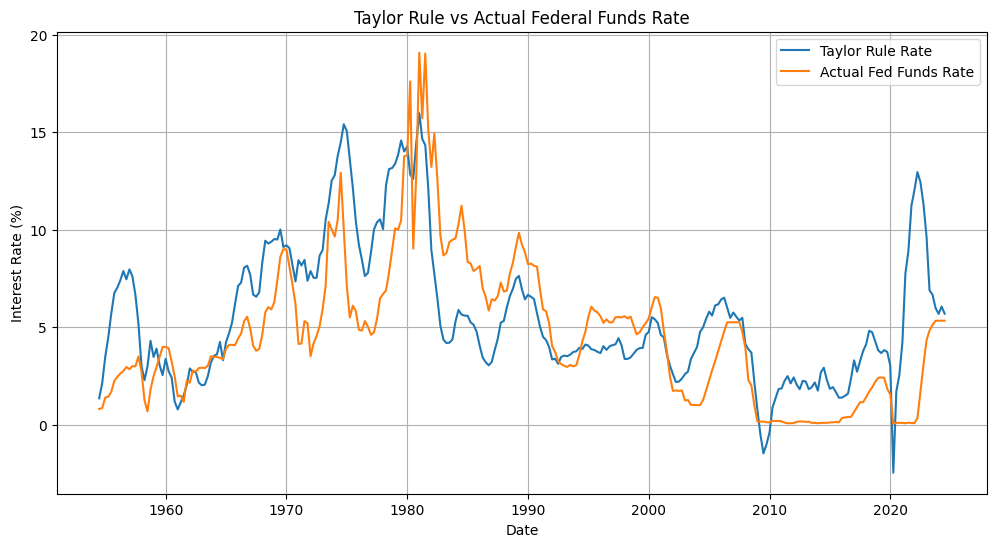

            Taylor Rule Rate  Actual Fed Funds Rate
2023-07-01          6.665168                   5.12
2023-10-01          5.982465                   5.33
2024-01-01          5.681328                   5.33
2024-04-01          6.058720                   5.33
2024-07-01          5.692118                   5.33


In [4]:

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Taylor Rule Rate'], label='Taylor Rule Rate')
plt.plot(results.index, results['Actual Fed Funds Rate'], label='Actual Fed Funds Rate')
plt.title('Taylor Rule vs Actual Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Print the most recent values
print(results.tail())